#📌 Extracción

In [3]:
import pandas as pd
import numpy as np

# --- FASE 1: CARGA DE DATOS ---
url_api = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
print("Cargando datos desde la API...")
df = pd.read_json(url_api)

Cargando datos desde la API...


#🔧 Transformación

In [5]:
# --- FASE 2: TRANSFORMACIÓN Y LIMPIEZA (ETL) ---

# 1. Aplanar (desempaquetar) las columnas anidadas
columnas_anidadas = ['customer', 'phone', 'internet', 'account']

for col in columnas_anidadas:
    # Convertimos la columna de diccionarios en un DataFrame nuevo
    df_aplanado = pd.json_normalize(df[col].tolist())
    # Unimos el nuevo DataFrame al original y eliminamos la columna anidada
    df = pd.concat([df.drop(columns=[col]), df_aplanado], axis=1)

print("\n¡Datos desempaquetados! Nuevas columnas disponibles:")
print(df.columns.tolist())

# 2. Corregir inconsistencias en 'Charges.Total'
# A veces viene con espacios vacíos (' '), los convertimos a nulos (NaN) y los eliminamos
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')
df.dropna(subset=['Charges.Total'], inplace=True)

# 3. Crear columna Cuentas_Diarias
df['Cuentas_Diarias'] = round(df['Charges.Monthly'] / 30, 2)

# 4. Estandarización de variables categóricas a binarias (1 y 0)
mapeo_binario = {'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0}

columnas_binarias = [
    'Churn', 'Partner', 'Dependents', 'PhoneService',
    'PaperlessBilling', 'gender'
]

for col in columnas_binarias:
    # Verificamos que la columna exista antes de mapear para evitar errores
    if col in df.columns:
        df[col] = df[col].map(mapeo_binario)

print("\nLimpieza y transformación completadas. Dimensiones del dataset final:", df.shape)
display(df.head())


¡Datos desempaquetados! Nuevas columnas disponibles:
['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total']

Limpieza y transformación completadas. Dimensiones del dataset final: (7256, 21)


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0.0,0,0,1,1,9,1,No,DSL,No,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.19
1,0.0,1,0,0,0,9,1,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,1.0,1,0,0,0,4,1,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,1.0,1,1,1,0,13,1,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,1.0,0,1,1,0,3,1,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.80


#📊 Carga y análisis

Estadísticas descriptivas de variables numéricas:


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7032.000000,7256.000000,7256.0000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000
mean,0.265785,0.505650,0.1629,0.483600,0.299063,32.395535,0.902839,0.593716,64.755423,2280.634213,2.158467
std,0.441782,0.500003,0.3693,0.499765,0.457879,24.558067,0.296197,0.491173,30.125739,2268.632997,1.004282
min,0.000000,0.000000,0.0000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.610000
25%,0.000000,0.000000,0.0000,0.000000,0.000000,9.000000,1.000000,0.000000,35.450000,400.225000,1.180000
50%,0.000000,1.000000,0.0000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1391.000000,2.340000
75%,1.000000,1.000000,0.0000,1.000000,1.000000,55.000000,1.000000,1.000000,89.900000,3785.300000,3.000000
max,1.000000,1.000000,1.0000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.960000


/tmp/ipython-input-3379368846.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='viridis')


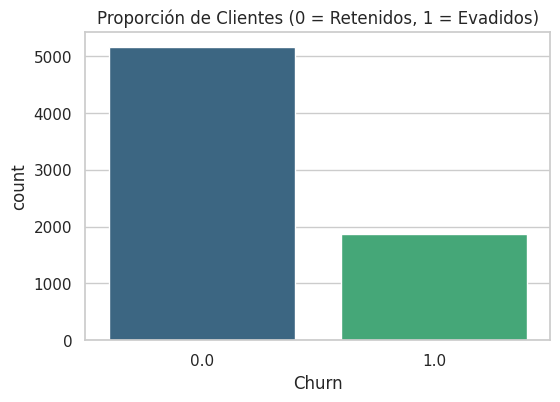

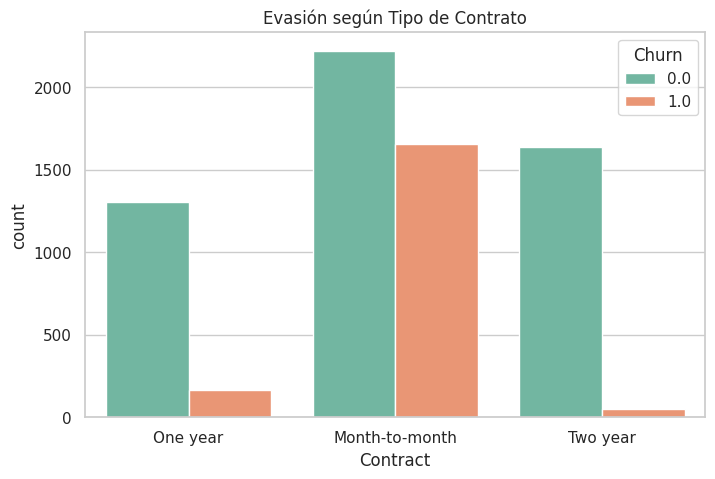

/tmp/ipython-input-3379368846.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Charges.Monthly', data=df, palette='coolwarm')


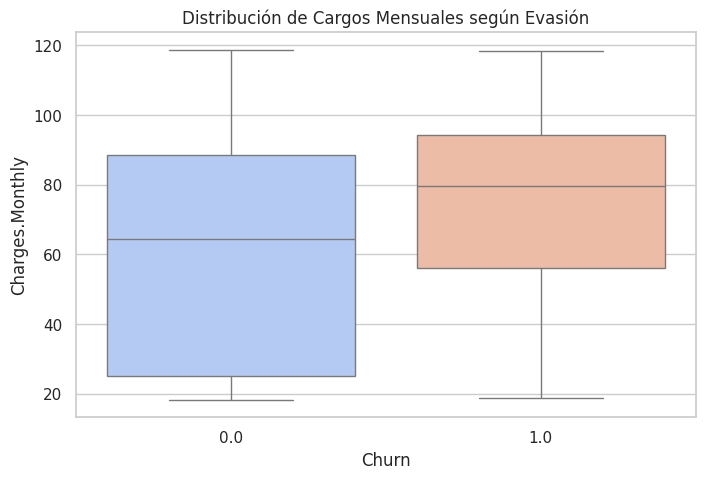

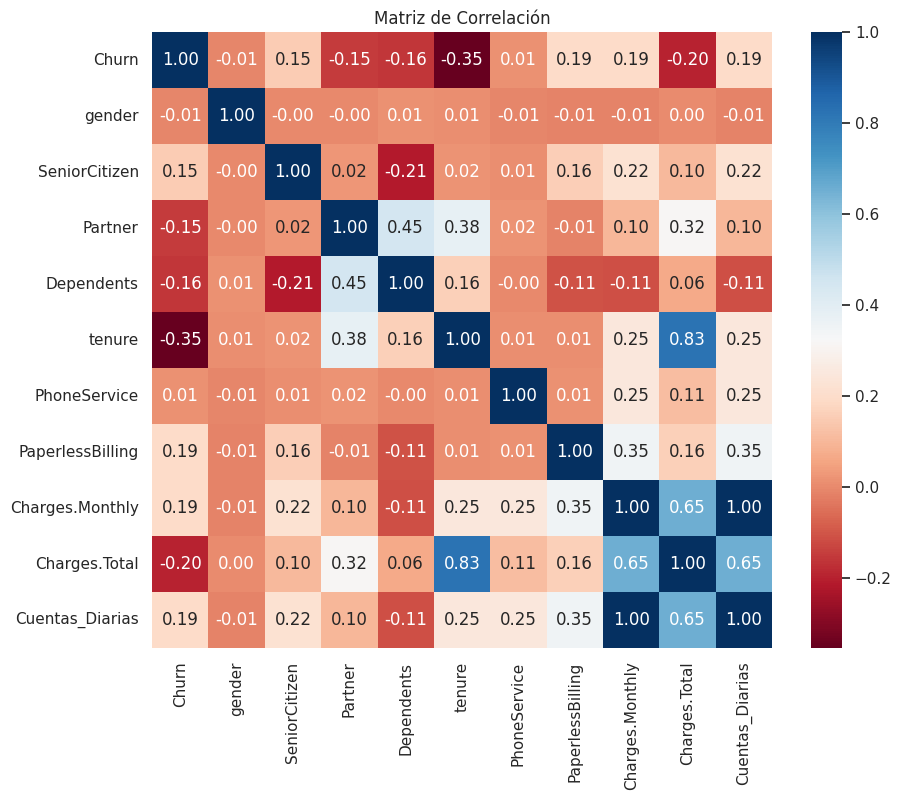

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para los gráficos
sns.set_theme(style="whitegrid")

# 1. Análisis descriptivo
print("Estadísticas descriptivas de variables numéricas:")
display(df.describe())

# 2. Proporción de Churn (Evasión)
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Proporción de Clientes (0 = Retenidos, 1 = Evadidos)')
plt.show()

# 3. Churn según variable categórica (Ejemplo: Tipo de Contrato)
plt.figure(figsize=(8, 5))
sns.countplot(x='Contract', hue='Churn', data=df, palette='Set2')
plt.title('Evasión según Tipo de Contrato')
plt.show()

# 4. Churn según variable numérica (Ejemplo: Cargos Mensuales)
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='Charges.Monthly', data=df, palette='coolwarm')
plt.title('Distribución de Cargos Mensuales según Evasión')
plt.show()

# 5. OPCIONAL: Matriz de Correlación
plt.figure(figsize=(10, 8))
# Seleccionamos solo las columnas numéricas para la correlación
columnas_numericas = df.select_dtypes(include=[np.number])
sns.heatmap(columnas_numericas.corr(), annot=True, cmap='RdBu', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

# Fase 1: Preparación y Análisis Dirigido

/tmp/ipython-input-2750815450.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=df, palette='viridis')


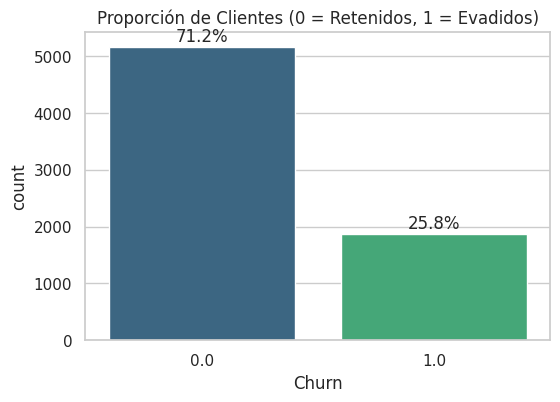

/tmp/ipython-input-2750815450.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=df, ax=axes[0], palette='coolwarm')
/tmp/ipython-input-2750815450.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Charges.Total', data=df, ax=axes[1], palette='coolwarm')


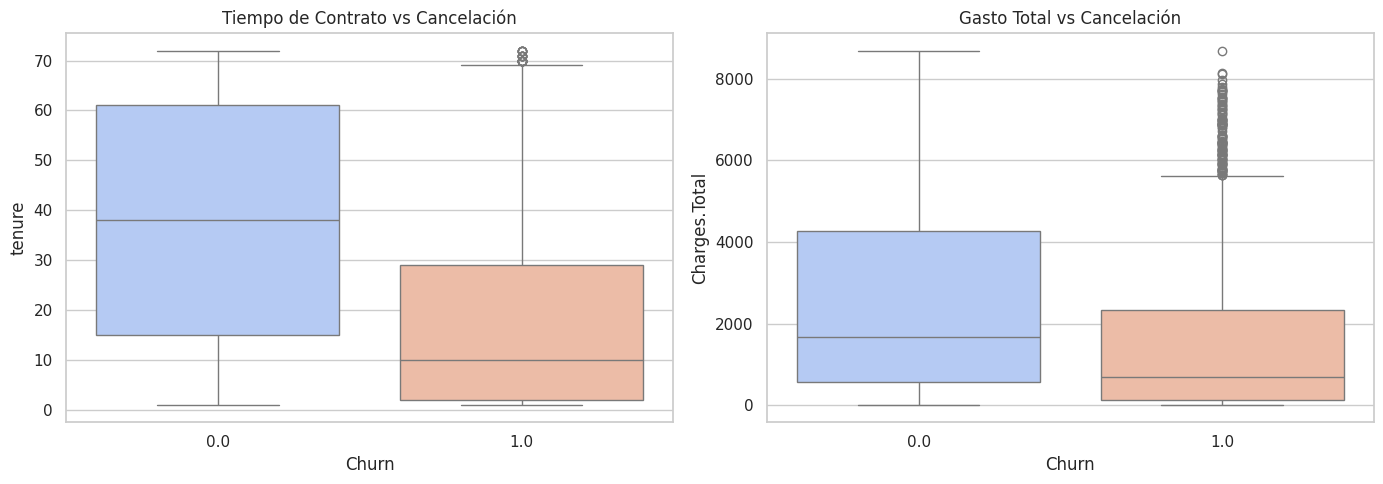

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar el dataset tratado de la Parte 1
# (Asegúrate de que la variable 'df' contenga los datos limpios de la fase anterior)
# Si lo guardaste en un CSV, usa: df = pd.read_csv('telecom_limpio.csv')

# 2. Eliminación de Columnas Irrelevantes
if 'customerID' in df.columns:
    df = df.drop(columns=['customerID'])
    print("Columna 'customerID' eliminada.")

# 3. Verificación de la Proporción de Cancelación (Churn)
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Proporción de Clientes (0 = Retenidos, 1 = Evadidos)')
# Mostrar porcentajes en el gráfico
total = len(df)
for p in ax.patches:
    porcentaje = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(porcentaje, (x, y), ha='center', va='center')
plt.show()

# 4. Análisis Dirigido (Tiempo de contrato y Gasto total vs Cancelación)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Tiempo de contrato (tenure) vs Cancelación
sns.boxplot(x='Churn', y='tenure', data=df, ax=axes[0], palette='coolwarm')
axes[0].set_title('Tiempo de Contrato vs Cancelación')

# Gasto total (Charges.Total) vs Cancelación
sns.boxplot(x='Churn', y='Charges.Total', data=df, ax=axes[1], palette='coolwarm')
axes[1].set_title('Gasto Total vs Cancelación')

plt.tight_layout()
plt.show()

# Fase 2: Preprocesamiento (Encoding, Split y Balanceo)

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# 1. Limpieza preventiva de nulos (NaN)
# Eliminamos cualquier fila que tenga valores vacíos para que los modelos no fallen
df = df.dropna()

# 2. Encoding (One-Hot Encoding para variables categóricas)
# Convertimos las variables tipo 'object' o categóricas en columnas binarias
df_encoded = pd.get_dummies(df, drop_first=True)

# 3. Separar las características (X) y la variable objetivo (y)
X = df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn']

# 4. Separación de Datos (80% Entrenamiento, 20% Prueba)
# Ahora sí, al no haber nulos, esta línea funcionará perfectamente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# 5. Balanceo de Clases con SMOTE (Aplicado SOLO a los datos de entrenamiento)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 6. Normalización / Estandarización
# Necesario para Regresión Logística, pero NO para Random Forest
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

print("¡Datos preparados exitosamente!")
print(f"Tamaño de entrenamiento balanceado: {X_train_smote.shape[0]} filas")
print(f"Tamaño de prueba: {X_test.shape[0]} filas")

¡Datos preparados exitosamente!
Tamaño de entrenamiento balanceado: 8260 filas
Tamaño de prueba: 1407 filas


# Fase 3: Modelado Predictivo y Evaluación

--- RESULTADOS: REGRESIÓN LOGÍSTICA ---
              precision    recall  f1-score   support

         0.0       0.85      0.81      0.83      1033
         1.0       0.54      0.62      0.58       374

    accuracy                           0.76      1407
   macro avg       0.70      0.71      0.70      1407
weighted avg       0.77      0.76      0.76      1407

--- RESULTADOS: RANDOM FOREST ---
              precision    recall  f1-score   support

         0.0       0.85      0.84      0.84      1033
         1.0       0.57      0.58      0.57       374

    accuracy                           0.77      1407
   macro avg       0.71      0.71      0.71      1407
weighted avg       0.77      0.77      0.77      1407



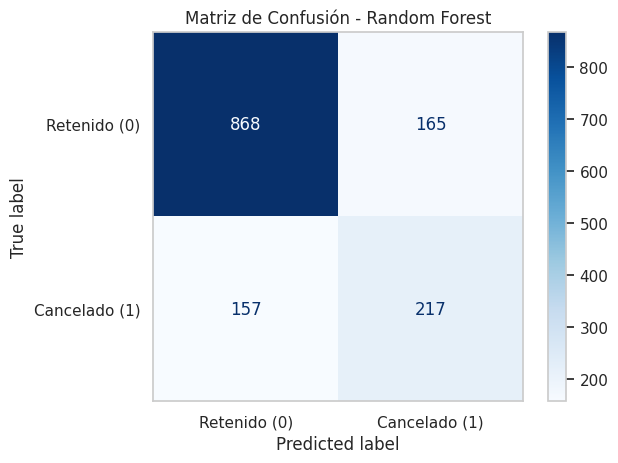

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# --- MODELO 1: REGRESIÓN LOGÍSTICA (Con datos normalizados) ---
modelo_lr = LogisticRegression(random_state=42, max_iter=1000)
modelo_lr.fit(X_train_scaled, y_train_smote)
y_pred_lr = modelo_lr.predict(X_test_scaled)

print("--- RESULTADOS: REGRESIÓN LOGÍSTICA ---")
print(classification_report(y_test, y_pred_lr))

# --- MODELO 2: RANDOM FOREST (Con datos sin normalizar) ---
modelo_rf = RandomForestClassifier(random_state=42, n_estimators=100)
modelo_rf.fit(X_train_smote, y_train_smote)
y_pred_rf = modelo_rf.predict(X_test)

print("--- RESULTADOS: RANDOM FOREST ---")
print(classification_report(y_test, y_pred_rf))

# Visualizar Matriz de Confusión para el mejor modelo (Ejemplo: Random Forest)
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Retenido (0)', 'Cancelado (1)'])
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión - Random Forest')
plt.grid(False)
plt.show()

# Fase 4: Interpretación de Variables Importantes

/tmp/ipython-input-504987000.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Variable', data=df_importancias.head(10), palette='viridis')


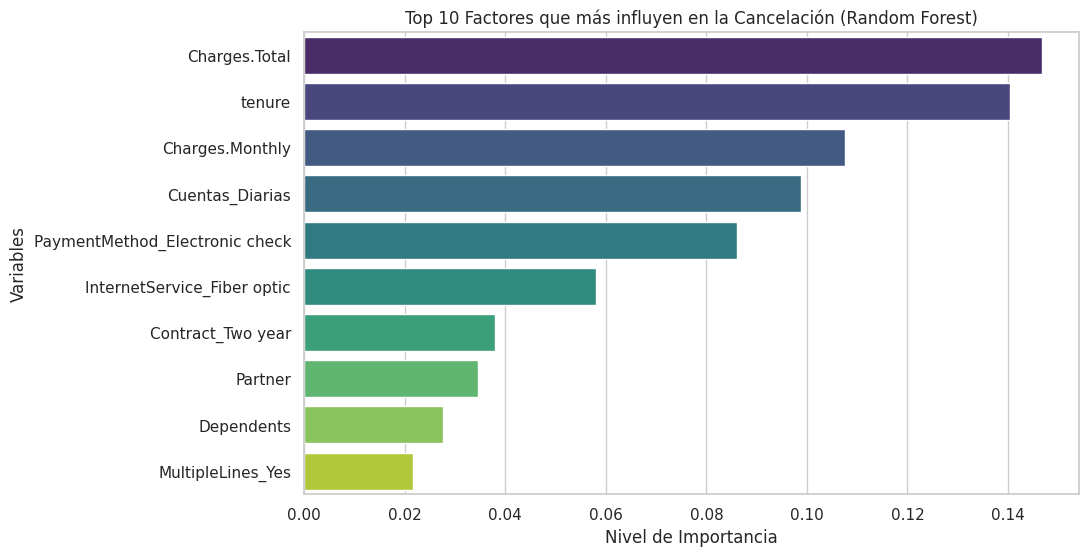

In [11]:
# Obtener la importancia de las variables desde Random Forest
importancias = modelo_rf.feature_importances_
nombres_variables = X.columns

# Crear un DataFrame para visualizar mejor
df_importancias = pd.DataFrame({
    'Variable': nombres_variables,
    'Importancia': importancias
}).sort_values(by='Importancia', ascending=False)

# Graficar las 10 variables más importantes
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Variable', data=df_importancias.head(10), palette='viridis')
plt.title('Top 10 Factores que más influyen en la Cancelación (Random Forest)')
plt.xlabel('Nivel de Importancia')
plt.ylabel('Variables')
plt.show()